# Lab: Tree-Based Classification

The notebook is based on the ISLP Lab 'Tree-based Methods'.

We import some of our usual libraries at this top
level.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm

We also  collect the new imports
needed for this lab.

In [2]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss, 
                             confusion_matrix,
                             ConfusionMatrixDisplay)

## Loading, preparing, and splitting data

We use the dataset *Predict students' dropout and academic success* from UCI ML repository, see https://archive.ics.uci.edu/dataset/697/ 

In [3]:
data = pd.read_csv('data.csv', sep=';')
data.sample(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
2378,1,43,1,9991,0,1,136.0,1,3,4,...,3,8,8,3,11.333333,0,7.6,2.6,0.32,Dropout
3277,1,1,1,9147,1,1,102.0,1,38,38,...,0,5,7,5,14.400000,0,11.1,0.6,2.02,Graduate
737,1,17,2,9254,1,1,130.0,1,37,37,...,0,6,15,3,11.333333,0,7.6,2.6,0.32,Dropout
1219,1,18,2,9147,1,1,143.0,1,19,38,...,0,5,6,5,12.166667,0,13.9,-0.3,0.79,Graduate
1045,1,7,1,9991,0,40,120.0,1,1,19,...,0,5,6,0,0.000000,0,12.4,0.5,1.79,Dropout


The last column `Target` is the target variable as its name suggests. Possible values are *dropout, enrolled, graduate*. We'll need feature names for visualizations.

In [4]:
features = list(data.columns)
classes = set(data['Target'])
X = data.drop('Target', axis=1)
y = data['Target']

We split the data into train (80%) and test (20%) subsets with stratification.

In [5]:
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train_split, X_validation, y_train_split, y_validation = skm.train_test_split(X_train, y_train, test_size=0.125, stratify=y_train, random_state=42)


## Baseline classifier

There are several options needed to specify the  classifier,
such as `max_depth` (how deep to grow the tree), `min_samples_split`
(minimum number of observations in a node to be eligible for splitting)
and `criterion` (whether to use Gini or cross-entropy as the split criterion).
We also set `random_state` for reproducibility; ties in the split criterion are broken at random.

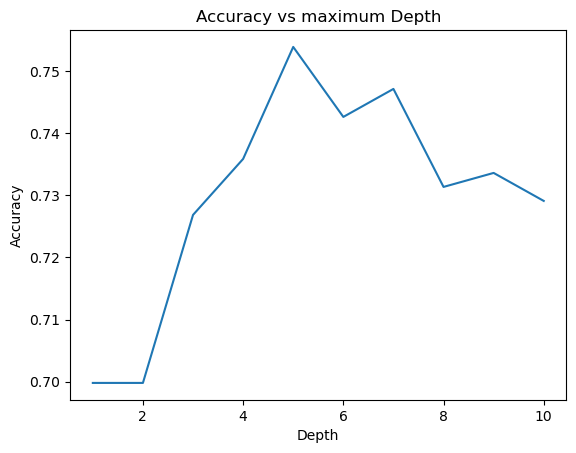

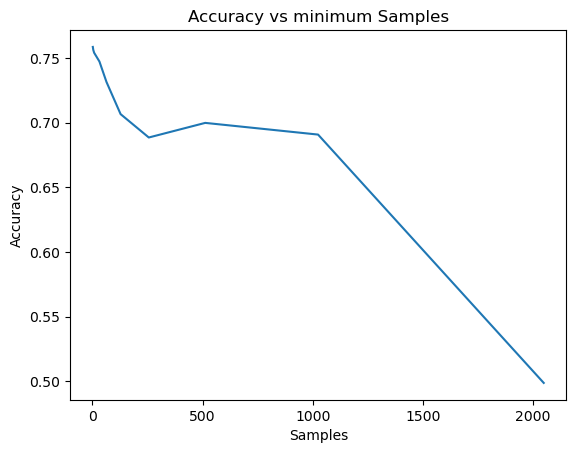

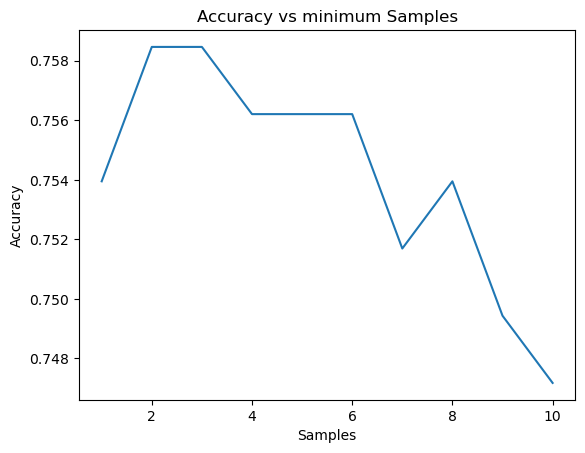

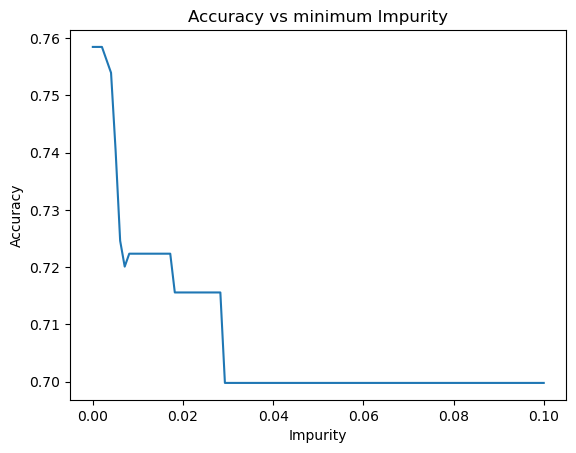

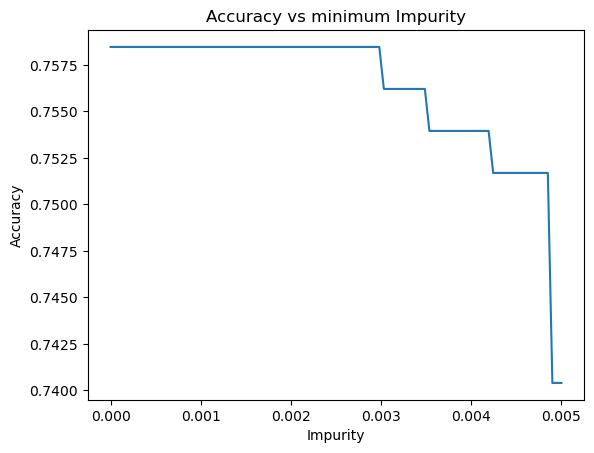

In [6]:
parameters = {
    "depth_score": [],
    "samples_score": [],
    "detailed_samples": [],
    "impurity_score": [],
    "detailed_impurity": []
}

depth = [i for i in range (1, 11)]
for i in depth:
    clf = DTC(criterion='entropy', max_depth=i, random_state=42)
    clf = clf.fit(X_train_split, y_train_split)
    parameters["depth_score"].append(accuracy_score(y_validation, clf.predict(X_validation)))

plt.plot(depth, parameters["depth_score"])
plt.title('Accuracy vs maximum Depth') 
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.show()

log = [2**i for i in range (1, 12)]
for i in log:
    clf = DTC(criterion = 'entropy', max_depth = 5, random_state = 42, min_samples_leaf = i)
    clf = clf.fit(X_train_split, y_train_split)
    parameters["samples_score"].append(accuracy_score(y_validation, clf.predict(X_validation)))

plt.plot(log, parameters["samples_score"])
plt.title('Accuracy vs minimum Samples') 
plt.ylabel('Accuracy')
plt.xlabel('Samples')
plt.show()

sample_num = np.linspace(1, 10, 10)
for i in sample_num:
    clf = DTC(criterion = 'entropy', max_depth = 5, random_state = 42, min_samples_leaf = int(i))
    clf = clf.fit(X_train_split, y_train_split)
    parameters["detailed_samples"].append(accuracy_score(y_validation, clf.predict(X_validation)))

plt.plot(sample_num, parameters["detailed_samples"])
plt.title('Accuracy vs minimum Samples') 
plt.ylabel('Accuracy')
plt.xlabel('Samples')
plt.show()

spaces = np.linspace(0, 0.1, num = 100)
for i in spaces:
    clf = DTC(criterion = 'entropy', max_depth = 5, random_state = 42, min_samples_leaf = 3, min_impurity_decrease = i)
    clf = clf.fit(X_train_split, y_train_split)
    parameters["impurity_score"].append(accuracy_score(y_validation, clf.predict(X_validation)))

plt.plot(spaces, parameters["impurity_score"])
plt.title('Accuracy vs minimum Impurity') 
plt.ylabel('Accuracy')
plt.xlabel('Impurity')
plt.show()

detail_space = np.linspace(0, 0.005, num = 100)
for i in detail_space:
    clf = DTC(criterion = 'entropy', max_depth = 5, random_state = 42, min_samples_leaf = 3, min_impurity_decrease = i)
    clf = clf.fit(X_train_split, y_train_split)
    parameters["detailed_impurity"].append(accuracy_score(y_validation, clf.predict(X_validation)))

plt.plot(detail_space, parameters["detailed_impurity"])
plt.title('Accuracy vs minimum Impurity') 
plt.ylabel('Accuracy')
plt.xlabel('Impurity')
plt.show()

Train and test the classifier.

#### First I found the accuracy of prediction vs maximum tree depth parameter. The best depth according to the graph was 5.
#### Next I found accuracy vs minimum sample number. The graph went downards the bigger the sample number became, so I had to make another comparison with less values. From 2 to 2048 set of data, I recognized the best accuracy to be between 1 and 10 minimum samples. Best number of samples turned out to be between 2 and 3, hence I randomly picked 3.
#### Finally, I plotted accuracy vs minimum decrease in impurity. Accuracy drastically dropped from 0.005 to 0.1, hence I had to once again remeasure the values. For that I chose values from 0 till 0.005, and the best accuracy was found to be between 0 and approximately 0.0029. I picked 0.001, because the accuracy didn't differ from the default value (0) at all

In [7]:
from sklearn.dummy import DummyClassifier

clf = DTC(criterion = 'entropy', max_depth = 3, random_state = 42)
clf = clf.fit(X_train, y_train)
print('Test set accuracy before parameter tuning: %f' % accuracy_score(y_test, clf.predict(X_test)))

clf = DTC(criterion = 'entropy', max_depth = 3, random_state = 42)
clf = clf.fit(X_train_split, y_train_split)
print('Test_split set accuracy without tuning: %f' % accuracy_score(y_validation, clf.predict(X_validation)))

clf = DTC(criterion = 'entropy', max_depth = 5, random_state = 42, min_samples_leaf = 3, min_impurity_decrease = 0.001)
clf = clf.fit(X_train, y_train)
print('Test set accuracy after parameter tuning: %f' % accuracy_score(y_test, clf.predict(X_test)))

clf = DTC(criterion = 'entropy', max_depth = 5, random_state = 42, min_samples_leaf = 3, min_impurity_decrease = 0.001)
clf = clf.fit(X_train_split, y_train_split)
print('Test_split set accuracy with tuning: %f' % accuracy_score(y_validation, clf.predict(X_validation)))

majority_clf = DummyClassifier(strategy='most_frequent')
majority_clf.fit(X_train, y_train)
accuracy_majority = accuracy_score(y_test, majority_clf.predict(X_test))
print(f"Accuracy of Majority Class Classifier: {accuracy_majority}")



Test set accuracy before parameter tuning: 0.732203
Test_split set accuracy without tuning: 0.726862
Test set accuracy after parameter tuning: 0.734463
Test_split set accuracy with tuning: 0.758465
Accuracy of Majority Class Classifier: 0.4994350282485876


#### As can be seen from the results of the testing, before parameter tuning, the accuracy score was 0.732203, while after parameter tuning the score increased to 0.734463. Hence, parameter tuning brough results, however they were not very significant. For the given dataset, the default values of minimum sample size before stopping, as well as, minimum decrease in impurity for splitting, seem to be sufficient. 
#### For Test set split into validation and another test sets, the situation is the same. Before tuning, the accuracy score is lower than after tuning, 0.726862 to 0.758465, respectively
#### In conclusion, for the given dataset, the biggest breakthrough in accuracy measurements came from changing maximum depth from 3 to 5. 
#### Finally, I used dummy classifier to test the classification ability of majority classification on a decision tree. The parameter chosen was most frequent class during the prediction. The accuracy score of such a baseline classifier was 0.499435, which is considerably lower than when using Decision Tree Classifier before parameter tuning AND after parameter tuning.

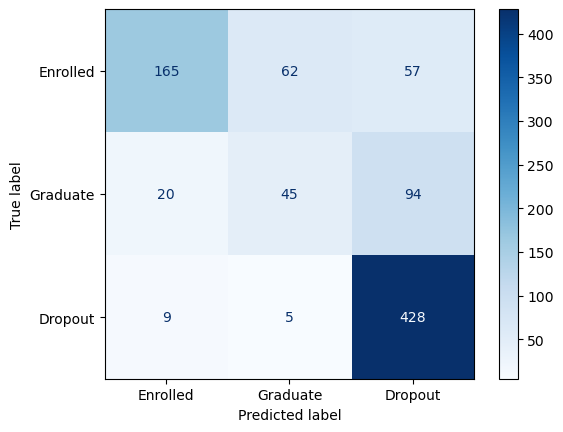

In [8]:
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        display_labels=classes,
        cmap=plt.cm.Blues,
    )

You can visualize the decision tree -- as an image or in text mode.

[Text(0.45614035087719296, 0.9166666666666666, 'Curricular units 2nd sem (approved) <= 3.5\nentropy = 1.471\nsamples = 3096\nvalue = [995.0, 555.0, 1546.0]'),
 Text(0.19298245614035087, 0.75, 'Curricular units 2nd sem (enrolled) <= 0.5\nentropy = 1.09\nsamples = 1022\nvalue = [738, 205, 79]'),
 Text(0.08771929824561403, 0.5833333333333334, 'Admission grade <= 136.05\nentropy = 1.423\nsamples = 133\nvalue = [60, 17, 56]'),
 Text(0.03508771929824561, 0.4166666666666667, 'Tuition fees up to date <= 0.5\nentropy = 1.35\nsamples = 75\nvalue = [45, 11, 19]'),
 Text(0.017543859649122806, 0.25, 'entropy = 0.414\nsamples = 12\nvalue = [11, 1, 0]'),
 Text(0.05263157894736842, 0.25, 'GDP <= -3.59\nentropy = 1.423\nsamples = 63\nvalue = [34, 10, 19]'),
 Text(0.03508771929824561, 0.08333333333333333, 'entropy = 0.954\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.07017543859649122, 0.08333333333333333, 'entropy = 1.395\nsamples = 55\nvalue = [29.0, 7.0, 19.0]'),
 Text(0.14035087719298245, 0.41666666666

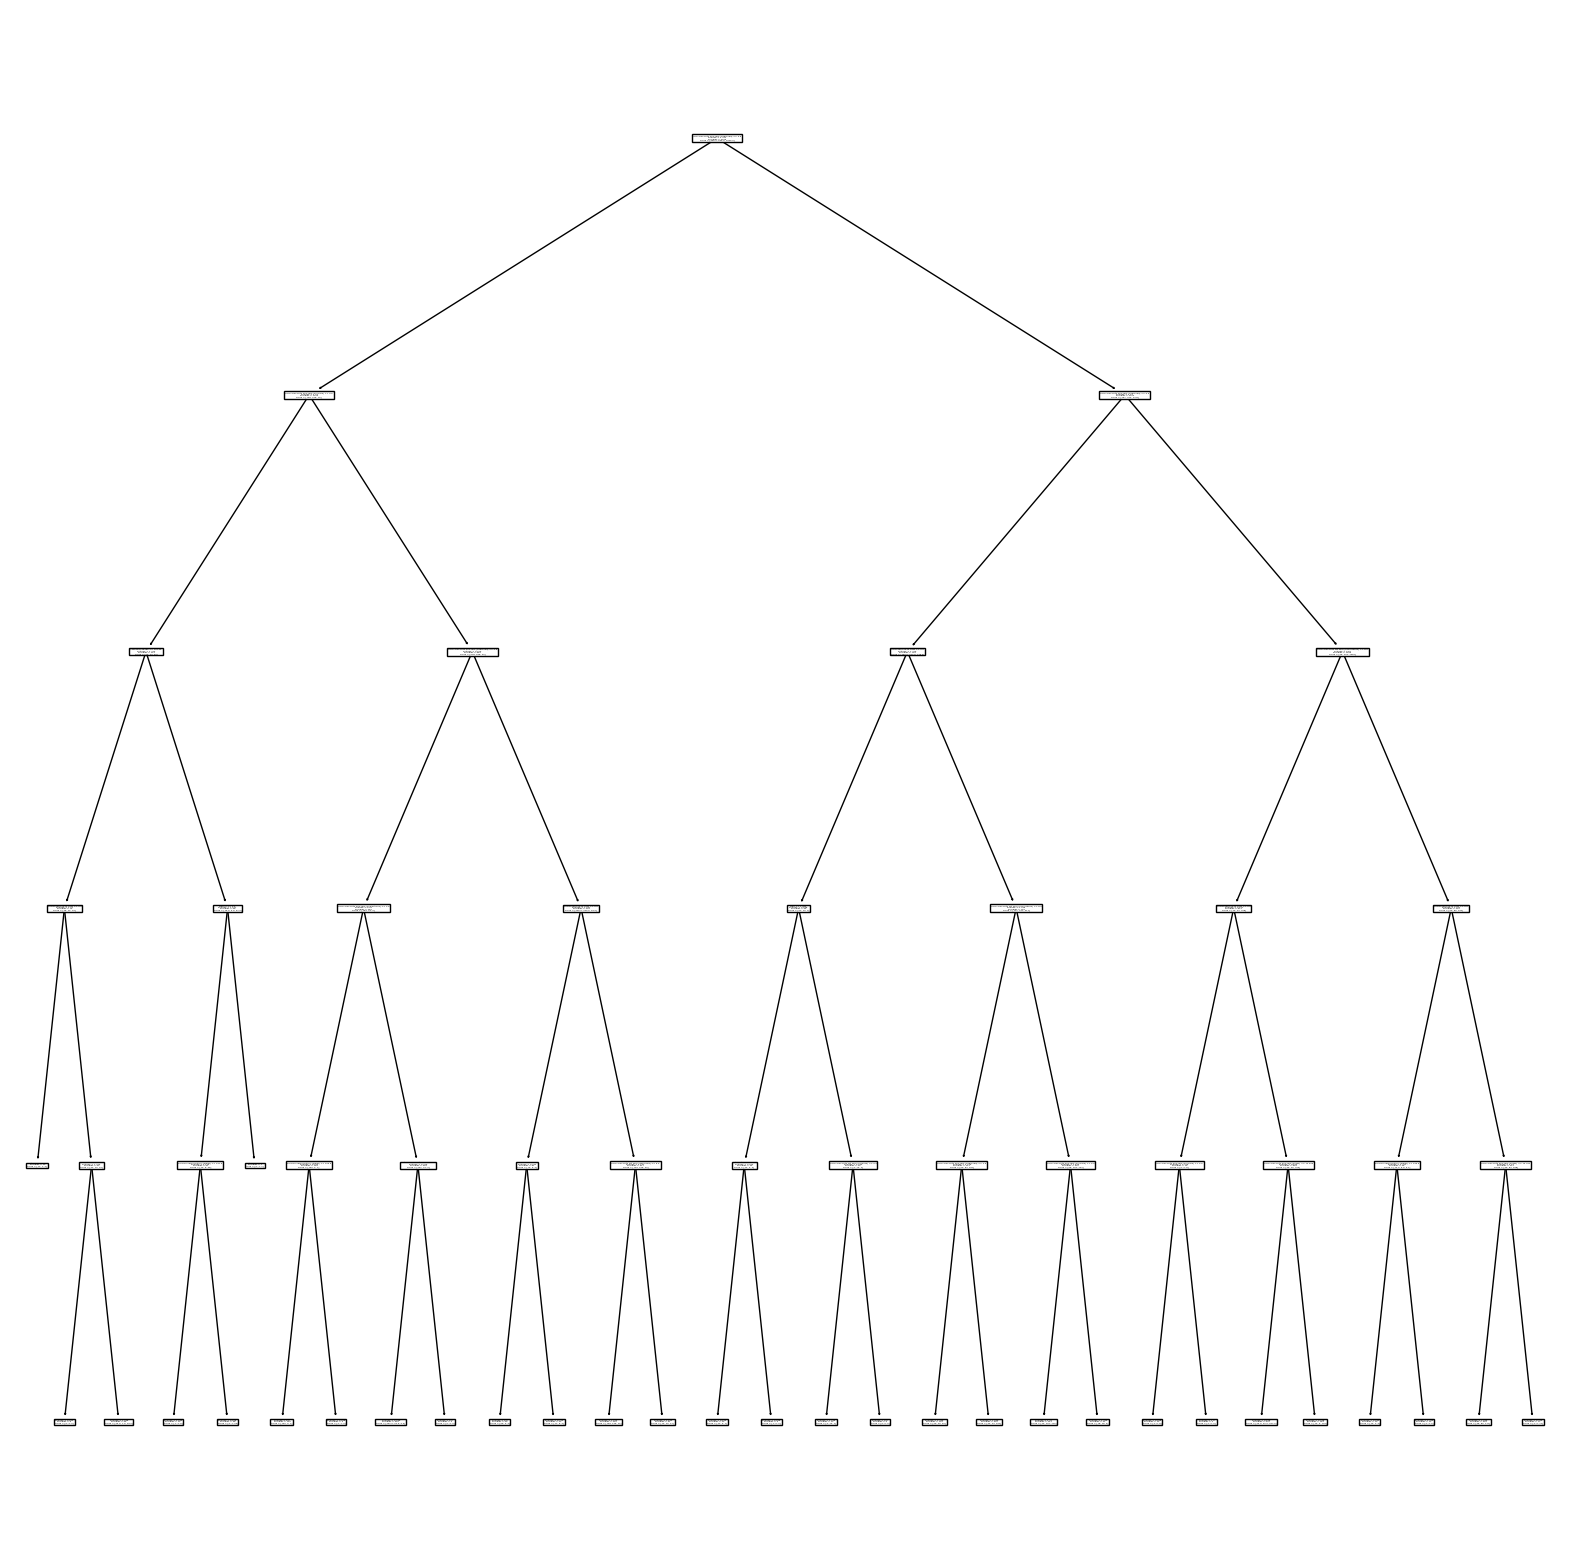

In [9]:
ax = subplots(figsize=(20,20))[1]
plot_tree(clf,
          feature_names=features[:-1],
          ax=ax)


In [10]:
r = export_text(clf, feature_names=features[:-1])
print(r)

|--- Curricular units 2nd sem (approved) <= 3.50
|   |--- Curricular units 2nd sem (enrolled) <= 0.50
|   |   |--- Admission grade <= 136.05
|   |   |   |--- Tuition fees up to date <= 0.50
|   |   |   |   |--- class: Dropout
|   |   |   |--- Tuition fees up to date >  0.50
|   |   |   |   |--- GDP <= -3.59
|   |   |   |   |   |--- class: Dropout
|   |   |   |   |--- GDP >  -3.59
|   |   |   |   |   |--- class: Dropout
|   |   |--- Admission grade >  136.05
|   |   |   |--- Debtor <= 0.50
|   |   |   |   |--- Previous qualification (grade) <= 137.50
|   |   |   |   |   |--- class: Graduate
|   |   |   |   |--- Previous qualification (grade) >  137.50
|   |   |   |   |   |--- class: Graduate
|   |   |   |--- Debtor >  0.50
|   |   |   |   |--- class: Dropout
|   |--- Curricular units 2nd sem (enrolled) >  0.50
|   |   |--- Curricular units 2nd sem (approved) <= 0.50
|   |   |   |--- Curricular units 2nd sem (evaluations) <= 4.50
|   |   |   |   |--- Previous qualification (grade) <= 163

## Tree pruning

Next, we consider whether pruning the tree might lead to improved
classification performance. We will use cross-validation to prune the tree on the training
set, and then evaluate the performance of the pruned tree on the test
set. We first refit the full tree on the training set; here we do not set a `max_depth` parameter, 
since we will learn that through cross-validation.

In [11]:
clf = DTC(criterion='entropy', max_depth=10, random_state=0)
clf = clf.fit(X_train, y_train)
print('Number of terminal nodes: ', clf.tree_.n_leaves)
print('Train set accuracy: %.4f' % accuracy_score(y_train, clf.predict(X_train)))
print('Test set accuracy: %.4f' % accuracy_score(y_test, clf.predict(X_test)))

Number of terminal nodes:  261
Train set accuracy: 0.8717
Test set accuracy: 0.6983


Next we use the `cost_complexity_pruning_path()` method of
`clf` to extract cost-complexity values.

In [12]:
ccp_path = clf.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(10,
                  random_state=1,
                  shuffle=True)


This yields a set of impurities and $\alpha$ values
from which we can extract an optimal one by cross-validation. 

*Grid search may take time on this dataset, be patient.*

In [13]:
grid = skm.GridSearchCV(clf,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X_train, y_train)
print('%.4f' % grid.best_score_)

0.7533


Evaluation results

In [14]:
best_ = grid.best_estimator_
print('Number of terminal nodes: ', best_.tree_.n_leaves)
print('Train set accuracy: %.4f' % accuracy_score(y_train, best_.predict(X_train)))
print('Test set accuracy: %.4f' % accuracy_score(y_test, best_.predict(X_test)))

Number of terminal nodes:  41
Train set accuracy: 0.7847
Test set accuracy: 0.7333


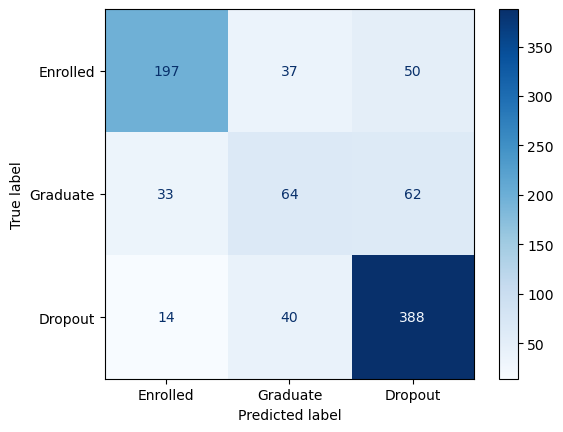

In [15]:
disp = ConfusionMatrixDisplay.from_estimator(
        best_,
        X_test,
        y_test,
        display_labels=classes,
        cmap=plt.cm.Blues,
    )